# I.Classification

In [7]:
from sklearn import datasets
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
digits = datasets.load_digits()

In [13]:
from sklearn.model_selection import train_test_split
import numpy as np
x = digits.data
y = digits.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=42, stratify=y)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train) 
    train_accuracy [i] = knn.score(x_train, y_train) 
    test_accuracy [i] = knn.score(x_test, y_test)

In [29]:
neighbors

array([1, 2, 3, 4, 5, 6, 7, 8])

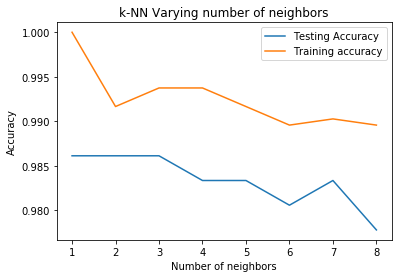

In [40]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [44]:
from sklearn.metrics import accuracy_score
knn_accur = KNeighborsClassifier()
knn_accur.fit(x_train, y_train)    
y_pred_knn = knn_accur.predict(x_test)
accur_knn = accuracy_score(y_test, y_pred_knn)
accur_knn

0.9833333333333333

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
kernelList=['linear', 'rbf', 'poly']
for kernel in kernelList:
    svclassifier = SVC(kernel=kernel)
    svclassifier.fit(x_train, y_train)
    print('kernel: ', kernel)
    y_pred = svclassifier.predict(x_test)
    print(classification_report(y_test,y_pred))

kernel:  linear
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        36
          1       0.92      0.94      0.93        36
          2       1.00      1.00      1.00        35
          3       1.00      0.97      0.99        37
          4       1.00      1.00      1.00        36
          5       1.00      1.00      1.00        37
          6       1.00      0.97      0.99        36
          7       0.97      1.00      0.99        36
          8       0.94      0.89      0.91        35
          9       0.95      1.00      0.97        36

avg / total       0.98      0.98      0.98       360

kernel:  rbf
             precision    recall  f1-score   support

          0       1.00      0.58      0.74        36
          1       1.00      0.61      0.76        36
          2       1.00      0.63      0.77        35
          3       1.00      0.86      0.93        37
          4       1.00      0.56      0.71        36
          5  

In [48]:

accur_SVM = accuracy_score(y_test, y_pred)
accur_SVM

0.9861111111111112

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB

gbn = GaussianNB()
gbn.fit(x_train, y_train)
y_pred_Bayes = gbn.predict(x_test)

In [56]:
accur_Bayes = accuracy_score(y_test, y_pred_Bayes)
accur_Bayes

0.8111111111111111

In [57]:
array = confusion_matrix(y_test, y_pred_Bayes)
array


array([[33,  0,  0,  0,  1,  1,  0,  0,  1,  0],
       [ 0, 29,  1,  0,  0,  0,  1,  0,  3,  2],
       [ 0,  3, 19,  0,  0,  0,  0,  0, 13,  0],
       [ 0,  0,  1, 26,  0,  0,  0,  1,  8,  1],
       [ 0,  2,  0,  0, 26,  0,  1,  6,  1,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  1,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 35,  0,  0],
       [ 0,  4,  1,  0,  0,  0,  0,  1, 29,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  4,  3, 25]], dtype=int64)

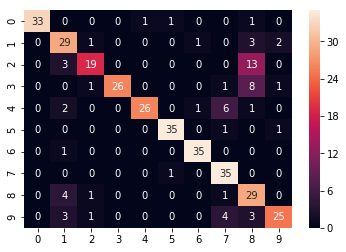

In [59]:

import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(array, annot=True, fmt=".0f")
plt.show()

([<matplotlib.axis.XTick at 0x29b03429438>,
 <a list of 3 Text xticklabel objects>)

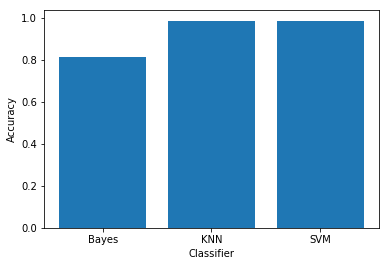

In [61]:
classifier = ['Bayes', 'KNN', 'SVM']
Accuracy = [accur_Bayes, accur_knn, accur_SVM]
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
x = np.arange(3)
plt.bar(x, height= Accuracy)
plt.xticks(x, classifier)

# II.Regression

In [62]:
import pandas as pd
import seaborn as sn
df = pd.read_csv('gapminder.csv')
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


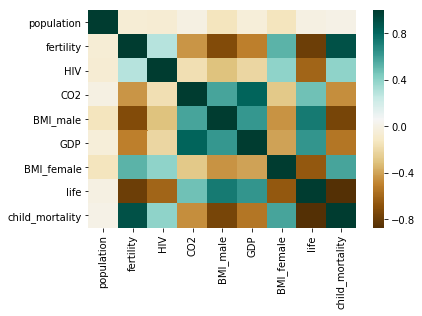

In [64]:
sn.heatmap(df.corr(), cmap='BrBG')

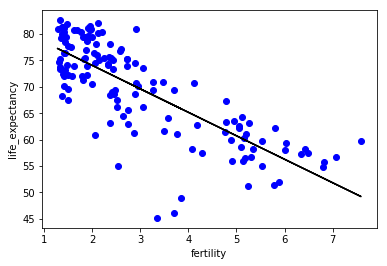

In [67]:
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
X = df['fertility'].values.reshape(-1, 1) 
X = X.astype('float')
y = df['life'].values.reshape(-1, 1)
y = y.astype('float')
slr.fit(X, y)
y_pred = slr.predict(X)

plt.scatter (X, y, c = 'blue')
plt.plot (X, y_pred, color = 'black')
plt.xlabel('fertility')
plt.ylabel('life_expectancy')
plt.show()

In [70]:
features = list(df.columns)
features = features[:-1]
features.pop(7)
features

['population',
 'fertility',
 'HIV',
 'CO2',
 'BMI_male',
 'GDP',
 'BMI_female',
 'child_mortality']

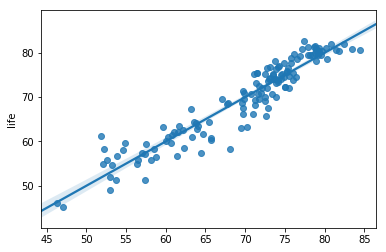

In [72]:
X_all = df[features]
slr.fit(X_all, y)
y_pred_all = slr.predict(X_all)
y_all = df['life']

sn.regplot(y_pred_all, y_all)
           

In [74]:
from sklearn.model_selection import cross_val_score
score_fertility = cross_val_score(slr, X, y)
print("Fertility: ", score_fertility)

Fertility:  [0.75397745 0.55557583 0.57886144]


In [76]:
score_fertility = cross_val_score(slr, X_all, y_all)
print("All features: ", score_fertility)

All features:  [0.83699524 0.87875694 0.89986165]
